<a href="https://colab.research.google.com/github/so-yeon-hwang/DataSciencePractice/blob/main/23_12_09_ds_rv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

--2023-12-09 13:08:39--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  15.3MB/s    in 0.3s    

2023-12-09 13:08:39 (15.3 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.ba

In [2]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("ml-100k/ua.base",sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("ml-100k/ua.test",sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

In [4]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [8]:
items

tensor([   1,    2,    3,  ..., 1188, 1228, 1330])

In [16]:
rank = 10
numItems = items.max() + 1 # 아이템 몇개?
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad = True) # 아이템 matrix P 생성
Q = torch.randn(numUsers, rank, requires_grad = True)

In [10]:
P # 아이템 matrix P , 유저 matrix Q

tensor([[ 0.9224, -1.0538, -0.0089,  ...,  0.9851, -0.9126, -0.1312],
        [-2.5925,  0.9582,  0.0452,  ..., -0.4962, -0.4036,  1.4839],
        [-0.0287, -1.3578, -0.1811,  ...,  1.0778,  0.5800, -1.1468],
        ...,
        [ 1.1048, -1.0194,  0.8318,  ..., -0.1062, -1.2678, -0.5482],
        [ 0.2401,  1.8846, -0.9151,  ..., -1.0541,  0.5675, -0.7268],
        [-0.0974, -0.4963,  0.1233,  ..., -0.6924, -2.3101, -0.1779]],
       requires_grad=True)

# 1. Latent Factor Model

epoch: 0, cost: 23.412312
epoch: 100, cost: 0.563850
epoch: 200, cost: 0.494760
epoch: 300, cost: 0.471763
epoch: 400, cost: 0.461277
epoch: 500, cost: 0.455123
epoch: 600, cost: 0.451372
epoch: 700, cost: 0.448764
epoch: 800, cost: 0.446769
epoch: 900, cost: 0.445171


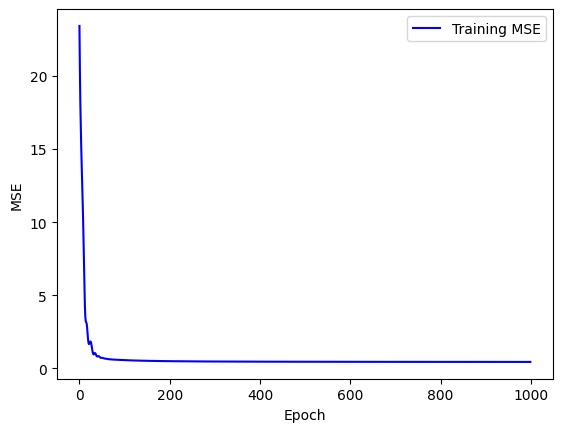

In [20]:
# 1. Matrix reset
rank = 10 # Dimension
num_items = items.max() + 1 # 개수
num_users = users.max() + 1

P = torch.randn(num_items, rank, requires_grad = True)
Q = torch.randn(num_users, rank, requires_grad = True)


# 2. Learning
optimizer = torch.optim.Adam([P,Q], lr = 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1000):
  h = torch.sum(P[items] * Q[users],dim = 1)
  cost = F.mse_loss(h,ratings)

  X.append(epoch)
  Y.append(cost.item())

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0 :
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))


# 3. Visualization : Training set MSE
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.plot(X,Y,c = 'blue', label = 'Training MSE')
plt.legend()
plt.show()

epoch: 0, cost: 23.722889
epoch: 100, cost: 0.566018
epoch: 200, cost: 0.492716
epoch: 300, cost: 0.470085
epoch: 400, cost: 0.460899
epoch: 500, cost: 0.455849
epoch: 600, cost: 0.452204
epoch: 700, cost: 0.449436
epoch: 800, cost: 0.447414
epoch: 900, cost: 0.445892


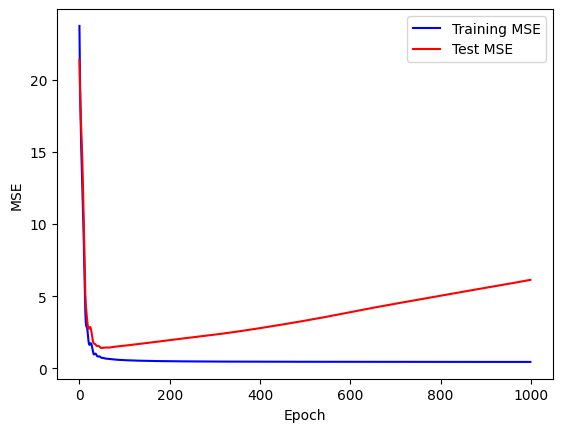

In [21]:
# 1. Matrix reset
rank = 10 # Dimension
num_items = items.max() + 1 # 개수
num_users = users.max() + 1

P = torch.randn(num_items, rank, requires_grad = True)
Q = torch.randn(num_users, rank, requires_grad = True)


# 2. Learning
optimizer = torch.optim.Adam([P,Q], lr = 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1000):
  h = torch.sum(P[items] * Q[users],dim = 1)
  cost = F.mse_loss(h,ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad(): # Stopg calculating Gradient calculating 기울기 계산 stop
    X.append(epoch)
    Y.append(cost.item())

    h_test = torch.sum(P[items_test] * Q[users_test],dim=1)
    cost_test = F.mse_loss(h_test,ratings_test)

    Y_test.append(cost_test.item())

  if epoch % 100 == 0 :
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))


# 3. Visualization : Training set MSE + Test set MSE

plt.ylabel('MSE')
plt.xlabel('Epoch')

plt.plot(X,Y,c = 'blue', label = 'Training MSE')
plt.plot(X,Y_test,c = 'red',label ='Test MSE')

plt.legend()
plt.show()

# 2. Regularization 추가

epoch: 0, cost: 23.534966
epoch: 100, cost: 0.697042
epoch: 200, cost: 0.640198
epoch: 300, cost: 0.630315
epoch: 400, cost: 0.628091
epoch: 500, cost: 0.627368
epoch: 600, cost: 0.627010
epoch: 700, cost: 0.626824
epoch: 800, cost: 0.626689
epoch: 900, cost: 0.626534


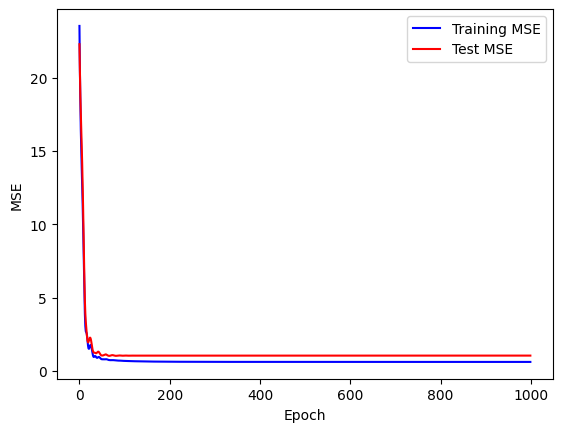

In [22]:
# 1. Matrix reset
rank = 10 # Dimension
num_items = items.max() + 1 # 개수
num_users = users.max() + 1

P = torch.randn(num_items, rank, requires_grad = True)
Q = torch.randn(num_users, rank, requires_grad = True)

lambda1 = 0.0001
lambda2 = 0.0001

# 2. Learning
optimizer = torch.optim.Adam([P,Q], lr = 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1000):
  h = torch.sum(P[items] * Q[users],dim = 1)
  cost = F.mse_loss(h,ratings)
  loss = cost + lambda1 * torch.sum(P**2) + lambda2 * torch.sum(Q **2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad(): # Stopg calculating Gradient calculating 기울기 계산 stop
    X.append(epoch)
    Y.append(cost.item())

    h_test = torch.sum(P[items_test] * Q[users_test],dim=1)
    cost_test = F.mse_loss(h_test,ratings_test)

    Y_test.append(cost_test.item())

  if epoch % 100 == 0 :
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))


# 3. Visualization : Training set MSE + Test set MSE

plt.ylabel('MSE')
plt.xlabel('Epoch')

plt.plot(X,Y,c = 'blue', label = 'Training MSE')
plt.plot(X,Y_test,c = 'red',label ='Test MSE')

plt.legend()
plt.show()

# 3. Global Baseline Estimation 추가

epoch: 0, cost: 13.242661
epoch: 100, cost: 0.605250
epoch: 200, cost: 0.578495
epoch: 300, cost: 0.574672
epoch: 400, cost: 0.573491
epoch: 500, cost: 0.573012
epoch: 600, cost: 0.572772
epoch: 700, cost: 0.572618
epoch: 800, cost: 0.572489
epoch: 900, cost: 0.572374


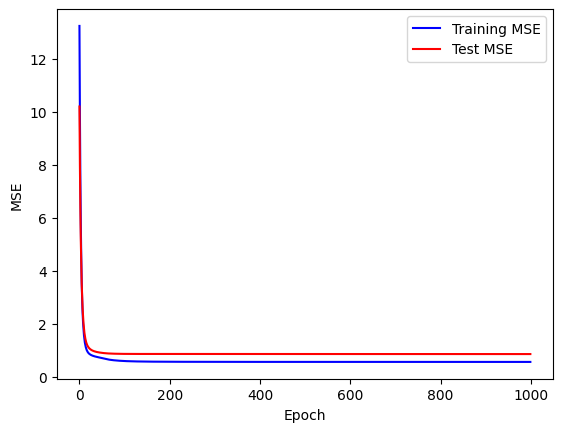

In [30]:
# 1. Matrix reset
rank = 10 # Dimension
num_items = items.max() + 1 # 개수
num_users = users.max() + 1

P = torch.randn(num_items, rank, requires_grad = True)
Q = torch.randn(num_users, rank, requires_grad = True)
bias_item = torch.randn(numItems, requires_grad = True)
bias_user = torch.randn(numUsers, requires_grad = True)
mean = (ratings.sum() / len(ratings)).item() # item() 형변환 역할

lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.0001
lambda4 = 0.0001


# 2. Learning
optimizer = torch.optim.Adam([P,Q,bias_item,bias_user], lr = 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1000):
  h = torch.sum(P[items] * Q[users],dim = 1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(h,ratings)
  loss = cost + lambda1 * torch.sum(P**2) + lambda2 * torch.sum(Q **2)\
    + lambda3 * torch.sum(bias_item **2) + lambda4 * torch.sum(bias_user ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad(): # Stopg calculating Gradient calculating 기울기 계산 stop
    h_test = torch.sum(P[items_test] * Q[users_test],dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(h_test,ratings_test)

    X.append(epoch)
    Y.append(cost.item())
    Y_test.append(cost_test.item())

  if epoch % 100 == 0 :
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))


# 3. Visualization : Training set MSE + Test set MSE

plt.ylabel('MSE')
plt.xlabel('Epoch')

plt.plot(X,Y,c = 'blue', label = 'Training MSE')
plt.plot(X,Y_test,c = 'red',label ='Test MSE')

plt.legend()
plt.show()